In [262]:
import pandas as pd

In [263]:
df=pd.read_excel('./stl.xlsx')

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [265]:
df

,File Name,X,Y,Z,V,SA,ZSA,XY,EV,PrintTime
0,ARM,10.850,24.504,28.903,534.080,685.664,1.981757e+04,265.870,7684.364,12.250
1,Bear,114.927,114.764,203.047,521494.127,56594.402,1.149130e+07,13189.478,2678077.464,395.333
2,Body,26.000,22.496,30.000,6738.644,2607.366,7.822099e+04,584.898,17546.944,25.533
3,Bolt1,13.856,12.000,30.000,1575.259,1215.058,3.645173e+04,166.277,4988.304,15.800
4,Bolt2,13.101,13.097,30.000,1315.144,1191.881,3.575643e+04,171.587,5147.624,16.017
...,...,...,...,...,...,...,...,...,...,...
3061,Vase6,129.869,121.130,176.000,1226886.285,76504.414,1.346478e+07,15730.932,2768644.108,593.117
3062,Vase7,110.149,106.421,180.000,554016.194,59480.078,1.070641e+07,11722.221,2109999.703,338.683
3063,Vase8,128.450,129.157,180.000,1422953.670,82588.125,1.486586e+07,16590.165,2986229.649,673.133
3064,Whale,300.224,131.252,74.404,297559.876,40098.500,2.983470e+06,39404.821,2931857.662,431.300


In [266]:
df.drop('File Name',axis=1,inplace=True)

In [267]:
df

,X,Y,Z,V,SA,ZSA,XY,EV,PrintTime
0,10.850,24.504,28.903,534.080,685.664,1.981757e+04,265.870,7684.364,12.250
1,114.927,114.764,203.047,521494.127,56594.402,1.149130e+07,13189.478,2678077.464,395.333
2,26.000,22.496,30.000,6738.644,2607.366,7.822099e+04,584.898,17546.944,25.533
3,13.856,12.000,30.000,1575.259,1215.058,3.645173e+04,166.277,4988.304,15.800
4,13.101,13.097,30.000,1315.144,1191.881,3.575643e+04,171.587,5147.624,16.017
...,...,...,...,...,...,...,...,...,...
3061,129.869,121.130,176.000,1226886.285,76504.414,1.346478e+07,15730.932,2768644.108,593.117
3062,110.149,106.421,180.000,554016.194,59480.078,1.070641e+07,11722.221,2109999.703,338.683
3063,128.450,129.157,180.000,1422953.670,82588.125,1.486586e+07,16590.165,2986229.649,673.133
3064,300.224,131.252,74.404,297559.876,40098.500,2.983470e+06,39404.821,2931857.662,431.300


In [257]:
correlation_matrix = np.corrcoef(df, rowvar=False)

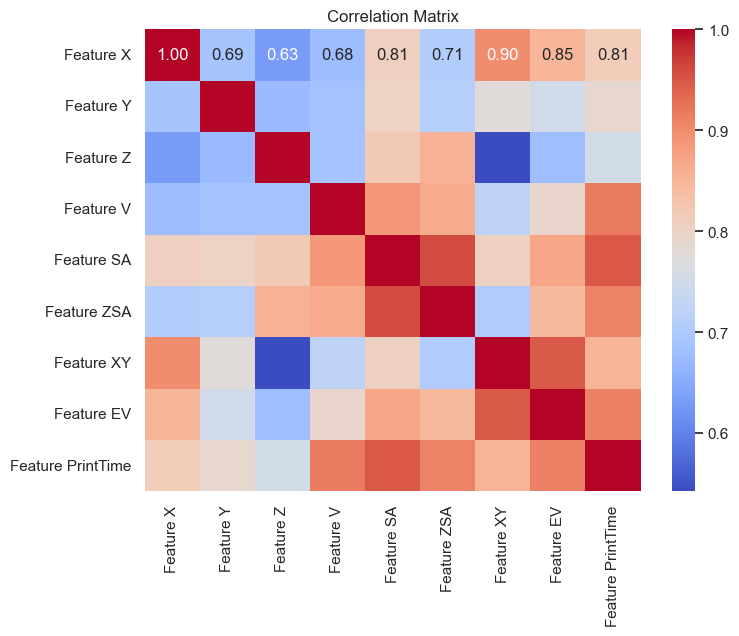

In [258]:
sns.set(style="white")  # 히트맵 스타일 설정
plt.figure(figsize=(8, 6))  # 플롯 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=[f"Feature {df.columns[i]}" for i in range(df.shape[1])],
            yticklabels=[f"Feature {df.columns[i]}" for i in range(df.shape[1])])
plt.title("Correlation Matrix")
plt.show()

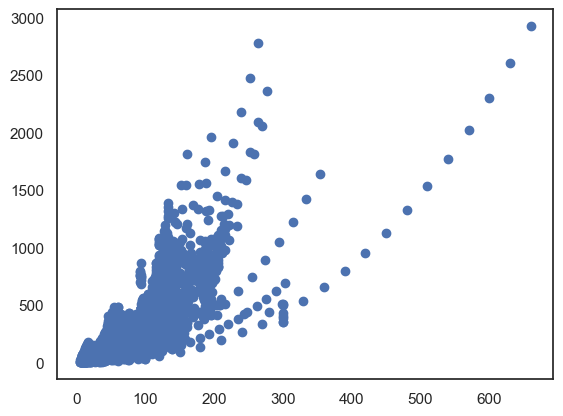

In [259]:
plt.scatter(df['X'],df['PrintTime'])

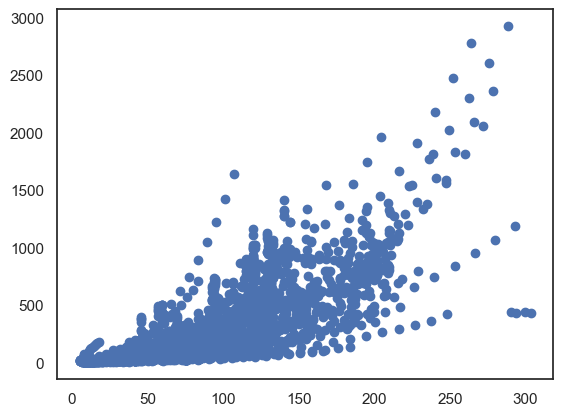

In [97]:
plt.scatter(df['Y'],df['PrintTime'])

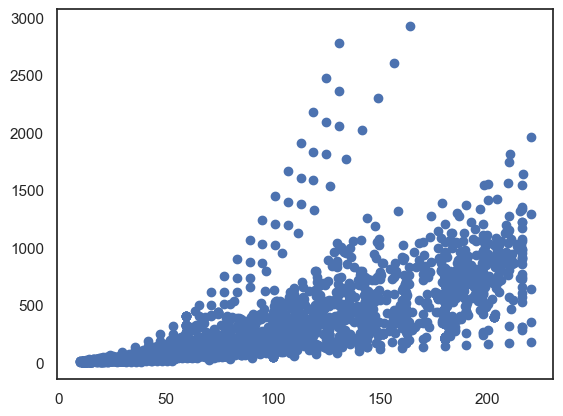

In [98]:
plt.scatter(df['Z'],df['PrintTime'])

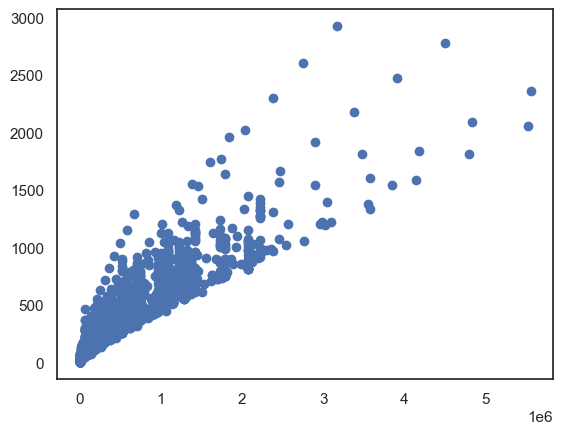

In [99]:
plt.scatter(df['V'],df['PrintTime'])

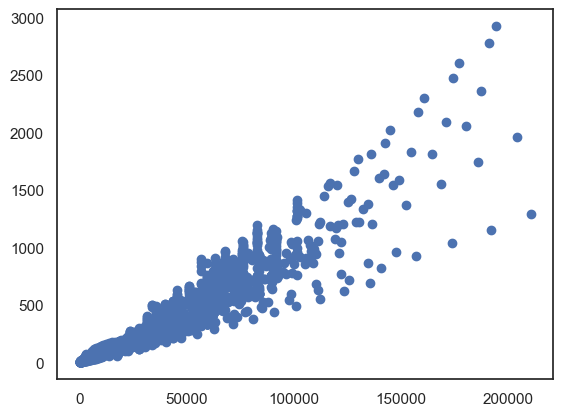

In [100]:
plt.scatter(df['SA'],df['PrintTime'])

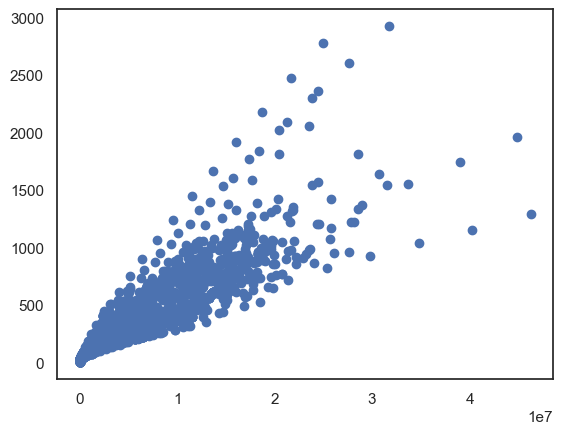

In [101]:
plt.scatter(df['ZSA'],df['PrintTime'])

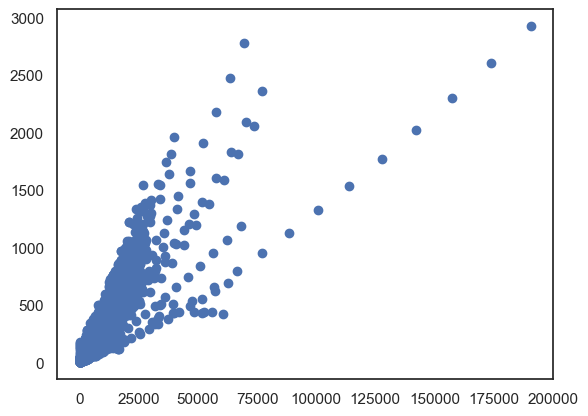

In [102]:
plt.scatter(df['XY'],df['PrintTime'])

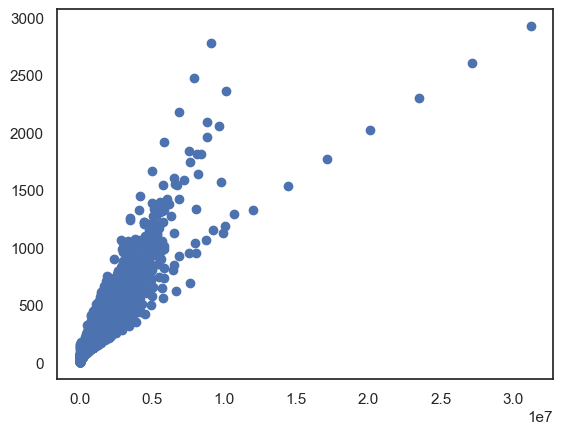

In [103]:
plt.scatter(df['EV'],df['PrintTime'])

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [106]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [107]:
X=df[df.columns[0:-1]]
y=df[df.columns[-1]]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
X_train_tensor = torch.FloatTensor(np.array(X_train))
y_train_tensor = torch.FloatTensor(np.array(y_train))
X_test_tensor = torch.FloatTensor(np.array(X_test))
y_test_tensor = torch.FloatTensor(np.array(y_test))

X_train_tensor=X_train_tensor.to(device)
X_test_tensor=X_test_tensor.to(device)
y_train_tensor=y_train_tensor.to(device)
y_test_tensor=y_test_tensor.to(device)

# 데이터 로더 정의
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)
for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)

for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)

In [110]:
Algorithm='ANN'

In [182]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.ReLU = nn.ReLU()  
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.ReLU = nn.ReLU() 
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ReLU(x)
        x = self.fc2(x)
        x = self.ReLU(x)
        x = self.fc4(x)
       
        return x

In [167]:
# 모델, 손실 함수, 최적화기 설정
input_size = 8
hidden_size = 8
output_size = 1

In [168]:
model = ImprovedNonLinearRegressionModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
history=[]
total_loss=0

In [169]:
total_acc=0
total_loss=0

In [183]:
epochs = 5000
model = model.to(device)

for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1,1))
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/5000], Loss: 2503.7119
Epoch [200/5000], Loss: 3575.5645
Epoch [300/5000], Loss: 1124.3197
Epoch [400/5000], Loss: 6300.6265
Epoch [500/5000], Loss: 5407.6299
Epoch [600/5000], Loss: 533.1613
Epoch [700/5000], Loss: 2945.1965
Epoch [800/5000], Loss: 2124.7981
Epoch [900/5000], Loss: 13048.2510
Epoch [1000/5000], Loss: 4571.3203
Epoch [1100/5000], Loss: 6369.5029
Epoch [1200/5000], Loss: 2439.8535
Epoch [1300/5000], Loss: 1985.5961
Epoch [1400/5000], Loss: 15563.6143
Epoch [1500/5000], Loss: 6893.8203
Epoch [1600/5000], Loss: 7952.9487
Epoch [1700/5000], Loss: 1726.6334
Epoch [1800/5000], Loss: 16532.2207
Epoch [1900/5000], Loss: 4734.2295
Epoch [2000/5000], Loss: 17037.8652
Epoch [2100/5000], Loss: 772.3305
Epoch [2200/5000], Loss: 1425.5189
Epoch [2300/5000], Loss: 1391.4019
Epoch [2400/5000], Loss: 747.2614
Epoch [2500/5000], Loss: 9160.4355
Epoch [2600/5000], Loss: 3223.3318
Epoch [2700/5000], Loss: 2236.2874
Epoch [2800/5000], Loss: 2725.2573
Epoch [2900/5000], Loss: 331

In [188]:
from sklearn.metrics import r2_score

In [189]:
model.eval()
with torch.no_grad():
    X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)
    y_pred = model(X_test_tensor)

model.train()


ImprovedNonLinearRegressionModel(
  (fc1): Linear(in_features=8, out_features=8, bias=True)
  (LeakyReLU): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=1, bias=True)
)

In [190]:
pred=torch.mean(y_pred)
target=torch.mean(y_test_tensor)
print(pred/target)

tensor(0.9390, device='cuda:0')


In [191]:
mae=0
mse=0
for x in range(len(y_test_tensor)):
    mae+=abs(y_test_tensor[x]-y_pred[x])
    mse+=(y_test_tensor[x]-y_pred[x])**2
print(mae/len(y_test_tensor),mse/len(y_test_tensor))

tensor([38.5182], device='cuda:0') tensor([4723.6860], device='cuda:0')


In [192]:
r2 = r2_score(y_test_tensor.cpu().numpy(), y_pred.cpu().numpy())
print("R-squared:", r2)

R-squared: 0.9495286597924782


In [227]:
from sklearn.ensemble import RandomForestRegressor

In [242]:
rf_model = RandomForestRegressor(n_estimators=1000, random_state=40)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=40)

In [243]:
y_pred = rf_model.predict(X_test)

In [244]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Rooted Mean Squared Error: {np.sqrt(mse)}")

Mean Squared Error: 2629.2294666271205
Rooted Mean Squared Error: 51.276012585097924


In [245]:
from sklearn.metrics import mean_absolute_error

In [246]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 24.262716908794683


In [247]:
from sklearn.metrics import r2_score 

In [248]:
r2 = r2_score(y_test, y_pred)
print(f"R-Square: {r2}")

R-Square: 0.9719073837978832


RandomForestRegressor(n_estimators=1000, random_state=40)